In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
tips = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\tips.csv',encoding = 'latin-1',sep = ',')

D:\software\Python\Anaconda_Install\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tips

,uid,vid,text,time,1,2,3,category,city_u,state_u,city_v,state_v,latitude,longtitude
0,32,457c232bf964a520fe3e1fe3,Go to Barbone (13th and B?) and order up off t...,1.210024e+09,43.0,11.0,1.0,4bf58dd8d48988d110941735,New York,NY,New York,NY,40.727845,-73.979340
1,32,40f1d480f964a520500a1fe3,"Get your seafood paella on at 1492, corner of ...",1.228723e+09,14.0,8.0,1.0,4bf58dd8d48988d1db931735,New York,NY,New York,NY,40.719400,-73.984900
2,32,433dd180f964a52047281fe3,Winter time + midweek + Backroom + fireplace =...,1.228814e+09,21.0,28.0,3.0,"4bf58dd8d48988d1d4941735,4bf58dd8d48988d121941...",New York,NY,New York,NY,40.718723,-73.986913
3,32,49008118f964a5205a521fe3,peanut brittle @ red head on 13th btw 1st and 2nd,1.232640e+09,6.0,13.0,4.0,"4d4ae6fc7a7b7dea34424761,4bf58dd8d48988d14f941...",New York,NY,New York,NY,40.730879,-73.983390
4,32,4989af90f964a5207f521fe3,"Cafe OST is the new Gramstand... free wi-fi, g...",1.233831e+09,32.0,29.0,1.0,4bf58dd8d48988d1e0931735,New York,NY,New York,NY,40.729300,-73.981800
5,32,3fd66200f964a520f8e41ee3,Go to Ace Bar and break 300 in skeeball. Rewar...,1.234183e+09,25.0,29.0,2.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d1e3931735",New York,NY,New York,NY,40.724400,-73.982800
6,32,3fd66200f964a52005e41ee3,"Front booths, right near the big windows, are ...",1.234612e+09,19.0,25.0,1.0,4bf58dd8d48988d116941735,New York,NY,New York,NY,40.719900,-73.987300
7,32,4995ce3cf964a52085521fe3,"Free (!!) wine tastings on Fri and Sat nights,...",1.234632e+09,23.0,14.0,2.0,"4bf58dd8d48988d123941735,4bf58dd8d48988d119951735",New York,NY,New York,NY,40.723669,-73.979312
8,32,47e2990df964a520434e1fe3,Bucket o' seafood (skrimps + crawfish + corn +...,1.236935e+09,10.0,11.0,1.0,4bf58dd8d48988d1ce941735,New York,NY,Austin,TX,30.266300,-97.735900
9,32,49fc6aa9f964a5209e6e1fe3,"Who knows about 2009, but last year these guys...",1.236935e+09,5.0,7.0,2.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d1d9941735",New York,NY,Austin,TX,30.266428,-97.738027


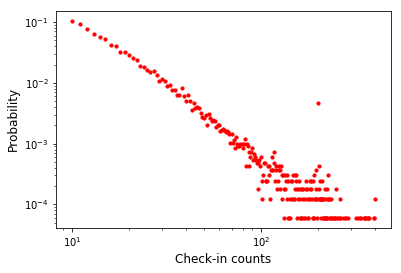

In [10]:
tip_count = tips.uid.value_counts()
tip_count = pd.DataFrame(tip_count[tip_count > 9]).uid.value_counts().sort_index(ascending = False)
probability = tip_count / tip_count.sum()
#cusum_pro = probability.cumsum().sort_index()

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(probability.index, probability.values,marker = 'o', c = 'r' ,s = 10)
plt.xlabel('Check-in counts',fontsize=12)
plt.ylabel('Probability',fontsize=12)
#plt.title('Distribution of User chech-ins ',fontsize = 14)
plt.show()

### NYC数据分析

In [5]:
home = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\f\NYC_home.csv',encoding = 'latin-1',sep=',')
out = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\f\NYC_out.csv',encoding = 'latin-1',sep=',')
venue = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\venues.csv',encoding = 'latin-1',sep=',')

In [6]:
print("本地：")
print("users:%d" % len(home['uid'].unique()))
print("venues:%d" % len(home['vid'].unique()))
print("tips:%d" % len(home.index))
print("非本地：")
print("users:%d" % len(out['uid'].unique()))
print("venues:%d" % len(out['vid'].unique()))
print("tips:%d" % len(out.index))

本地：
users:2588
venues:35743
tips:77957
非本地：
users:1245
venues:36189
tips:58163


In [7]:
venue.head()

,vid,latitude,longtitude,city,state,check-ins,checkd users,cnums,category
0,4c94b5f082b56dcbae61d1aa,40.403035,-74.354640,Old Bridge,NJ,9,3,1.0,4bf58dd8d48988d137941735
1,4b7c9374f964a520e99b2fe3,38.556187,-90.396452,NaN,NaN,133,108,1.0,4bf58dd8d48988d110941735
2,4bd8d2132e6f0f4748c80808,40.567686,-74.548777,Bound Brook,NJ,61,51,1.0,4bf58dd8d48988d110941735
3,4a920bfdf964a520b21c20e3,40.476497,-74.269338,South Amboy,NJ,332,121,4.0,"4bf58dd8d48988d159941735,4bf58dd8d48988d163941..."
4,4b992e4bf964a520826735e3,40.478508,-74.281921,South Amboy,NJ,59,25,1.0,4bf58dd8d48988d1ca941735


In [8]:
home.head()

,uid,vid,text,time,3,category,city_u,state_u,city_v,state_v
0,33,4c2d2c157d85a5935a3352f3,"sit outside on the deck, get a whole lobster, ...",1.309731e+09,1.0,4bf58dd8d48988d1ce941735,New York,NY,Point Lookout,NY
1,33,4b0587b9f964a52053a122e3,you only get once chance to see the tuna catch...,1.308692e+09,2.0,"4bf58dd8d48988d1d2941735,4bf58dd8d48988d1ff941735",New York,NY,Tokyo,Japan
2,33,4ba01604f964a520dc5837e3,the restaurant balcony high up is a great plac...,1.308692e+09,1.0,4bf58dd8d48988d1fa931735,New York,NY,NaN,NaN
3,33,4c3722e93849c928de1dbdb1,memory lane makes me feel like i'm on the set ...,1.308692e+09,1.0,4bf58dd8d48988d116941735,New York,NY,NaN,NaN
4,33,4b86a474f964a520da9331e3,if you're hanging out in roppongi and you miss...,1.308691e+09,4.0,"4bf58dd8d48988d1ca941735,4bf58dd8d48988d116941...",New York,NY,NaN,NaN


In [9]:
nyc  = pd.concat([home,out]) #本地和非本地用户的所有签到
venue.index = venue.vid
nyc = pd.merge(nyc,venue[['latitude','longtitude','check-ins']],left_on = 'vid',right_index = True,how = 'left')

In [10]:
nyc

,uid,vid,text,time,3,category,city_u,state_u,city_v,state_v,latitude,longtitude,check-ins
0,33,4c2d2c157d85a5935a3352f3,"sit outside on the deck, get a whole lobster, ...",1.309731e+09,1.0,4bf58dd8d48988d1ce941735,New York,NY,Point Lookout,NY,40.593912,-73.580128,104
1,33,4b0587b9f964a52053a122e3,you only get once chance to see the tuna catch...,1.308692e+09,2.0,"4bf58dd8d48988d1d2941735,4bf58dd8d48988d1ff941735",New York,NY,Tokyo,Japan,35.663079,139.768351,275
2,33,4ba01604f964a520dc5837e3,the restaurant balcony high up is a great plac...,1.308692e+09,1.0,4bf58dd8d48988d1fa931735,New York,NY,NaN,NaN,35.683618,139.766453,114
3,33,4c3722e93849c928de1dbdb1,memory lane makes me feel like i'm on the set ...,1.308692e+09,1.0,4bf58dd8d48988d116941735,New York,NY,NaN,NaN,35.693119,139.699353,28
4,33,4b86a474f964a520da9331e3,if you're hanging out in roppongi and you miss...,1.308691e+09,4.0,"4bf58dd8d48988d1ca941735,4bf58dd8d48988d116941...",New York,NY,NaN,NaN,35.660481,139.726690,225
5,33,4cfe1c8a084f548142ad8e09,one of my tokyo favorites. sister spot to the ...,1.308691e+09,0.0,NaN,New York,NY,NaN,NaN,35.694243,139.704884,2
6,33,4b05879ff964a520009d22e3,one of my most favorite places in the world (a...,1.308691e+09,1.0,4bf58dd8d48988d11e941735,New York,NY,Tokyo,Japan,35.694037,139.704441,8
7,33,4b0587a0f964a520689d22e3,we picked the prix fixe but i think a better i...,1.308691e+09,3.0,"4bf58dd8d48988d14e941735,4bf58dd8d48988d1d9941...",New York,NY,NaN,NaN,35.685636,139.690631,142
8,33,4b05879af964a520b69b22e3,a must-stay when in tokyo. pick up some food a...,1.308691e+09,1.0,4bf58dd8d48988d1fa931735,New York,NY,Tokyo,Japan,35.685390,139.691192,769
9,33,4aa07a5bf964a520c63f20e3,i particularly love the outdoor patio with a v...,1.308691e+09,1.0,4bf58dd8d48988d110941735,New York,NY,Las Vegas,NV,36.119122,-115.173154,170


NYC种类数据缺失值填充

In [11]:
caty = nyc.category
caty = caty.fillna(method = 'ffill')
nyc.category = caty
nyc

,uid,vid,text,time,3,category,city_u,state_u,city_v,state_v,latitude,longtitude,check-ins
0,33,4c2d2c157d85a5935a3352f3,"sit outside on the deck, get a whole lobster, ...",1.309731e+09,1.0,4bf58dd8d48988d1ce941735,New York,NY,Point Lookout,NY,40.593912,-73.580128,104
1,33,4b0587b9f964a52053a122e3,you only get once chance to see the tuna catch...,1.308692e+09,2.0,"4bf58dd8d48988d1d2941735,4bf58dd8d48988d1ff941735",New York,NY,Tokyo,Japan,35.663079,139.768351,275
2,33,4ba01604f964a520dc5837e3,the restaurant balcony high up is a great plac...,1.308692e+09,1.0,4bf58dd8d48988d1fa931735,New York,NY,NaN,NaN,35.683618,139.766453,114
3,33,4c3722e93849c928de1dbdb1,memory lane makes me feel like i'm on the set ...,1.308692e+09,1.0,4bf58dd8d48988d116941735,New York,NY,NaN,NaN,35.693119,139.699353,28
4,33,4b86a474f964a520da9331e3,if you're hanging out in roppongi and you miss...,1.308691e+09,4.0,"4bf58dd8d48988d1ca941735,4bf58dd8d48988d116941...",New York,NY,NaN,NaN,35.660481,139.726690,225
5,33,4cfe1c8a084f548142ad8e09,one of my tokyo favorites. sister spot to the ...,1.308691e+09,0.0,"4bf58dd8d48988d1ca941735,4bf58dd8d48988d116941...",New York,NY,NaN,NaN,35.694243,139.704884,2
6,33,4b05879ff964a520009d22e3,one of my most favorite places in the world (a...,1.308691e+09,1.0,4bf58dd8d48988d11e941735,New York,NY,Tokyo,Japan,35.694037,139.704441,8
7,33,4b0587a0f964a520689d22e3,we picked the prix fixe but i think a better i...,1.308691e+09,3.0,"4bf58dd8d48988d14e941735,4bf58dd8d48988d1d9941...",New York,NY,NaN,NaN,35.685636,139.690631,142
8,33,4b05879af964a520b69b22e3,a must-stay when in tokyo. pick up some food a...,1.308691e+09,1.0,4bf58dd8d48988d1fa931735,New York,NY,Tokyo,Japan,35.685390,139.691192,769
9,33,4aa07a5bf964a520c63f20e3,i particularly love the outdoor patio with a v...,1.308691e+09,1.0,4bf58dd8d48988d110941735,New York,NY,Las Vegas,NV,36.119122,-115.173154,170


In [12]:
nc = nyc.loc[nyc.category.isnull()] #没有种类的索引
hc = nyc.loc[nyc.category.notnull()]#有种类的索引

In [13]:
#将uid和vid映射为数值型
u = nyc[['uid']].copy().drop_duplicates()
v = nyc[['vid']].copy().drop_duplicates()

In [14]:
u['u'] = np.arange(len(u))
u.index = u['uid']
del u['uid']

v['v'] = np.arange(len(v))
v.index = v['vid']
del v['vid']

In [15]:
nyc = pd.merge(nyc, u, left_on = 'uid', right_index = True, how = 'left')
nyc = pd.merge(nyc, v, left_on = 'vid', right_index = True, how = 'left')

In [16]:
nyc

,uid,vid,text,time,3,category,city_u,state_u,city_v,state_v,latitude,longtitude,check-ins,u,v
0,33,4c2d2c157d85a5935a3352f3,"sit outside on the deck, get a whole lobster, ...",1.309731e+09,1.0,4bf58dd8d48988d1ce941735,New York,NY,Point Lookout,NY,40.593912,-73.580128,104,0,0
1,33,4b0587b9f964a52053a122e3,you only get once chance to see the tuna catch...,1.308692e+09,2.0,"4bf58dd8d48988d1d2941735,4bf58dd8d48988d1ff941735",New York,NY,Tokyo,Japan,35.663079,139.768351,275,0,1
2,33,4ba01604f964a520dc5837e3,the restaurant balcony high up is a great plac...,1.308692e+09,1.0,4bf58dd8d48988d1fa931735,New York,NY,NaN,NaN,35.683618,139.766453,114,0,2
3,33,4c3722e93849c928de1dbdb1,memory lane makes me feel like i'm on the set ...,1.308692e+09,1.0,4bf58dd8d48988d116941735,New York,NY,NaN,NaN,35.693119,139.699353,28,0,3
4,33,4b86a474f964a520da9331e3,if you're hanging out in roppongi and you miss...,1.308691e+09,4.0,"4bf58dd8d48988d1ca941735,4bf58dd8d48988d116941...",New York,NY,NaN,NaN,35.660481,139.726690,225,0,4
5,33,4cfe1c8a084f548142ad8e09,one of my tokyo favorites. sister spot to the ...,1.308691e+09,0.0,"4bf58dd8d48988d1ca941735,4bf58dd8d48988d116941...",New York,NY,NaN,NaN,35.694243,139.704884,2,0,5
6,33,4b05879ff964a520009d22e3,one of my most favorite places in the world (a...,1.308691e+09,1.0,4bf58dd8d48988d11e941735,New York,NY,Tokyo,Japan,35.694037,139.704441,8,0,6
7,33,4b0587a0f964a520689d22e3,we picked the prix fixe but i think a better i...,1.308691e+09,3.0,"4bf58dd8d48988d14e941735,4bf58dd8d48988d1d9941...",New York,NY,NaN,NaN,35.685636,139.690631,142,0,7
8,33,4b05879af964a520b69b22e3,a must-stay when in tokyo. pick up some food a...,1.308691e+09,1.0,4bf58dd8d48988d1fa931735,New York,NY,Tokyo,Japan,35.685390,139.691192,769,0,8
9,33,4aa07a5bf964a520c63f20e3,i particularly love the outdoor patio with a v...,1.308691e+09,1.0,4bf58dd8d48988d110941735,New York,NY,Las Vegas,NV,36.119122,-115.173154,170,0,9


In [17]:
nyc['uid'] = nyc['u']
del nyc['u']
nyc['vid'] = nyc['v']
del nyc['v']

In [18]:
print('用户数：%d' % len(nyc['uid'].unique()))
print('地点数：%d' % len(nyc['vid'].unique()))
print('签到数：%d' % len(nyc))

用户数：3828
地点数：62207
签到数：136120


In [24]:
nyc.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\f\NYC.csv',sep = ',',index = False)

In [20]:
nyc.head()

,uid,vid,text,time,3,category,city_u,state_u,city_v,state_v,latitude,longtitude,check-ins
0,0,0,"sit outside on the deck, get a whole lobster, ...",1.309731e+09,1.0,4bf58dd8d48988d1ce941735,New York,NY,Point Lookout,NY,40.593912,-73.580128,104
1,0,1,you only get once chance to see the tuna catch...,1.308692e+09,2.0,"4bf58dd8d48988d1d2941735,4bf58dd8d48988d1ff941735",New York,NY,Tokyo,Japan,35.663079,139.768351,275
2,0,2,the restaurant balcony high up is a great plac...,1.308692e+09,1.0,4bf58dd8d48988d1fa931735,New York,NY,NaN,NaN,35.683618,139.766453,114
3,0,3,memory lane makes me feel like i'm on the set ...,1.308692e+09,1.0,4bf58dd8d48988d116941735,New York,NY,NaN,NaN,35.693119,139.699353,28
4,0,4,if you're hanging out in roppongi and you miss...,1.308691e+09,4.0,"4bf58dd8d48988d1ca941735,4bf58dd8d48988d116941...",New York,NY,NaN,NaN,35.660481,139.726690,225


NYC的兴趣点整理，地点种类映射,NYC总共17917个地点

In [21]:
nyc_venue = nyc.loc[nyc.city_v == 'New York']
nyc_venue = nyc_venue.drop_duplicates('vid')
#nyc_venue.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\f\实验数据\nyc_venues.txt',index = False,header=False)

In [22]:
nyc_venue

,uid,vid,text,time,3,category,city_u,state_u,city_v,state_v,latitude,longtitude,check-ins
11,0,11,great little spot. i particularly like the col...,1.307485e+09,1.0,4bf58dd8d48988d1ff941735,New York,NY,New York,NY,40.719926,-74.005040,12
12,0,12,"for some reason, i always get the chicken and ...",1.303758e+09,2.0,"4bf58dd8d48988d10b941735,4bf58dd8d48988d1cb941735",New York,NY,New York,NY,40.730511,-73.992426,305
13,0,13,warm up with an old-fashioned. split the duck ...,1.303431e+09,2.0,"4bf58dd8d48988d110941735,4bf58dd8d48988d1d4941735",New York,NY,New York,NY,40.734500,-74.002900,920
14,0,14,a great spot for a party ?????my favorite part...,1.303399e+09,1.0,4bf58dd8d48988d1f1931735,New York,NY,New York,NY,40.747763,-74.006995,437
17,0,17,"big fan of: the lamb, the popcorn cr?¡§me br??...",1.298928e+09,2.0,"4bf58dd8d48988d14e941735,4bf58dd8d48988d157941735",New York,NY,New York,NY,40.721807,-73.996974,664
19,0,19,finish your meal by splitting a double scoop o...,1.298484e+09,1.0,4bf58dd8d48988d14e941735,New York,NY,New York,NY,40.724429,-73.983436,825
20,0,20,I love this izakaya. Just when you thought the...,1.294704e+09,2.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d11c941735",New York,NY,New York,NY,40.760053,-73.983308,1315
22,0,22,come for the views,1.292016e+09,1.0,4bf58dd8d48988d125941735,New York,NY,New York,NY,40.728141,-73.991128,12723
24,0,23,love the elastic feel of these hand-pulled. i ...,1.290558e+09,1.0,4bf58dd8d48988d1d1941735,New York,NY,New York,NY,40.725763,-73.992662,725
25,0,24,"on the north side, in between the 4th and 5th ...",1.290558e+09,2.0,"4bf58dd8d48988d18f941735,4bf58dd8d48988d181941735",New York,NY,New York,NY,40.722400,-73.993000,3485


In [118]:
#NYC 地点和种类整理
def f(x):
    if x != None:
        return str(x).split(',')
    else:
        return None
pref = nyc_venue[['vid','category']]
pref['category'] = pref['category'].map(f)

cat = []  #整理用户种类
for i in range(len(pref)):
    n,c= pref.iloc[i]
    if c != None:
        for p in c:
            cat.append([n,p])

cpref = pd.DataFrame(cat,columns = ['vid','cid'])
#cpref.index = cpref['uid']
cpref['vid'] = cpref['vid'].replace('nan',np.nan)
cpref = cpref.dropna()
cpref.index = np.arange(len(cpref))
cpref['nums'] = np.ones(len(cpref))

vc = cpref.groupby(['vid','cid'],as_index = False).count()
#要有一个随机填充 
vc

D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,vid,cid,nums
0,11,4bf58dd8d48988d1ff941735,1
1,12,4bf58dd8d48988d10b941735,1
2,12,4bf58dd8d48988d1cb941735,1
3,13,4bf58dd8d48988d110941735,1
4,13,4bf58dd8d48988d1d4941735,1
5,14,4bf58dd8d48988d1f1931735,1
6,17,4bf58dd8d48988d14e941735,1
7,17,4bf58dd8d48988d157941735,1
8,19,4bf58dd8d48988d14e941735,1
9,20,4bf58dd8d48988d116941735,1


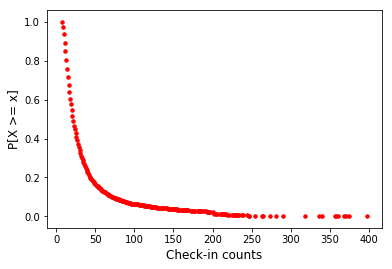

In [23]:
#用户签到数目统计

user_con = nyc['uid'].value_counts().sort_values()
user_con = pd.DataFrame(user_con)
user_con = user_con.uid.value_counts().sort_index(ascending = False)
user_con 
probility = user_con / user_con.sum()
csum_pro = probility.cumsum().sort_index()

#sns.scatterplot(x="Check-in counts", y="Probability", data = csum_pro)
plt.figure()
plt.scatter(csum_pro.index, csum_pro.values,color = 'r',s = 12)
#ax.set_xticks([])
plt.xlabel('Check-in counts',fontsize = 12)
plt.ylabel('P[X >= x]',fontsize = 12)
plt.show()

In [97]:
nyctips = nyc.copy()
nyctips.index = nyctips.city_v
nyctips = nyctips[nyctips.index == 'New York']
nyctips.index = nyctips.city_u
nyctips_home = nyctips[nyctips.index == 'New York']
nyctips_out = nyctips[nyctips.index != 'New York']
nyctips_home.index = range(len(nyctips_home)) #NYC本地用户在NYC的签到
nyctips_out.index = range(len(nyctips_out))##NYC非本地用户在NYC的签到

In [98]:
nyctips_home

,Unnamed: 0,uid,vid,text,time,3,category,city_u,state_u,city_v,state_v,latitude,longtitude,check-ins
0,11,0,11,great little spot. i particularly like the col...,1.307485e+09,1.0,4bf58dd8d48988d1ff941735,New York,NY,New York,NY,40.719926,-74.005040,12
1,12,0,12,"for some reason, i always get the chicken and ...",1.303758e+09,2.0,"4bf58dd8d48988d10b941735,4bf58dd8d48988d1cb941735",New York,NY,New York,NY,40.730511,-73.992426,305
2,13,0,13,warm up with an old-fashioned. split the duck ...,1.303431e+09,2.0,"4bf58dd8d48988d110941735,4bf58dd8d48988d1d4941735",New York,NY,New York,NY,40.734500,-74.002900,920
3,14,0,14,a great spot for a party ?????my favorite part...,1.303399e+09,1.0,4bf58dd8d48988d1f1931735,New York,NY,New York,NY,40.747763,-74.006995,437
4,17,0,17,"big fan of: the lamb, the popcorn cr?¡§me br??...",1.298928e+09,2.0,"4bf58dd8d48988d14e941735,4bf58dd8d48988d157941735",New York,NY,New York,NY,40.721807,-73.996974,664
5,19,0,19,finish your meal by splitting a double scoop o...,1.298484e+09,1.0,4bf58dd8d48988d14e941735,New York,NY,New York,NY,40.724429,-73.983436,825
6,20,0,20,I love this izakaya. Just when you thought the...,1.294704e+09,2.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d11c941735",New York,NY,New York,NY,40.760053,-73.983308,1315
7,22,0,22,come for the views,1.292016e+09,1.0,4bf58dd8d48988d125941735,New York,NY,New York,NY,40.728141,-73.991128,12723
8,23,0,22,"the \don't stop believing\"" conference room is...",1.292015e+09,1.0,4bf58dd8d48988d125941735,New York,NY,New York,NY,40.728141,-73.991128,12723
9,24,0,23,love the elastic feel of these hand-pulled. i ...,1.290558e+09,1.0,4bf58dd8d48988d1d1941735,New York,NY,New York,NY,40.725763,-73.992662,725


## 四大城市种类整理

In [169]:
tips.index = [tips.city_v,tips.city_u]
tips

uid                       vid  \
city_v         city_u                                            
Hyattsville    New York      6787469  4d14c82de190721ec4200a21   
               New York      6787469  4d14c82de190721ec4200a21   
Annandale      New York      6787469  4bd465f06798ef3b9c7e618d   
               New York      6787469  4bd465f06798ef3b9c7e618d   
               New York      6787469  4c14f9f27f7f2d7fa1a1e168   
               New York      6787469  4c14f9f27f7f2d7fa1a1e168   
Springfield    New York      6787469  4b37f857f964a520704925e3   
               New York      6787469  4b37f857f964a520704925e3   
Oxon Hill      New York      6787469  4c02cd846c349c74023b750c   
               New York      6787469  4c02cd846c349c74023b750c   
Pasadena       New York      6787469  4d028db48620224b85939d40   
               New York      6787469  4d028db48620224b85939d40   
Lanham         New York      6787469  4bbfb3b7b492d13aa522a360   
               New York      6787469  4bbfb3b7b492d13aa522a360   
Woodbridge     New York      6787469  4b816b37f964a520eea430e3   
               New York      6787469  4b816b37f964a520eea430e3   
Herndon        New York      6787469  4b52078df964a5207b6227e3   
               New York      6787469  4b52078df964a5207b6227e3   
Fairfax        New York      6787469  4bcb1b56cc8cd13a6daabecf   
               New York      6787469  4bcb1b56cc8cd13a6daabecf   
Eldersburg     New York      6787469  4bc1f5b874a9a593a774d2f6   
               New York      6787469  4bc1f5b874a9a593a774d2f6   
3              New York      6787469  4bf595e84d5f20a1f4b697fe   
               New York      6787469  4bf595e84d5f20a1f4b697fe   
silver spring  New York      6787469  4b1b2f79f964a52056f923e3   
               New York      6787469  4b1b2f79f964a52056f923e3   
Baltimore      New York      6787469  4c976a1438dd8cfa2b5ee362   
               New York      6787469  4c976a1438dd8cfa2b5ee362   
Edgewater      New York      6787469  4bcb79a70687ef3b79d5ddcc   
               New York      6787469  4bcb79a70687ef3b79d5ddcc   
...                              ...                       ...   
Brooklyn       Newport News  2281479  3fd66200f964a52061ee1ee3   
New York       Newport News  2281479  4b5c9d52f964a520ff3929e3   
               Newport News  2281479  4a77735bf964a52088e41fe3   
Brooklyn       Newport News  2281479  4bdb106663c5c9b651262668   
               Newport News  2281479  4a9b199ff964a520653420e3   
               Newport News  2281479  4b5f688bf964a5209fb829e3   
Newport News   Newport News  2281479  4c4c2ea5f7cc1b8d1be1f040   
NaN            Newport News  2281479  4b889ce0f964a520740432e3   
Newport News   Newport News  2281479  4c45f040f1d80f47207ba23c   
               Newport News  2281479  4ba3a443f964a5200f4f38e3   
Sherman oaks   Los Angeles    279534  4b9be3b6f964a520f13136e3   
Mountain View  Los Angeles    279534  4bda95fc3904a59391d4469e   
West Hollywood Los Angeles    279534  4744d246f964a520864c1fe3   
Los Angeles    Los Angeles    279534  4bb060c6f964a52028433ce3   
               Los Angeles    279534  3fd66200f964a5204aef1ee3   
Studio City    Los Angeles    279534  4a78e187f964a520a6e61fe3   
Los Angeles    Los Angeles    279534  49c49dcaf964a520d0561fe3   
               Los Angeles    279534  4af68c05f964a5206a0322e3   
               Los Angeles    279534  433f2300f964a52051281fe3   
               Los Angeles    279534  4a240eddf964a520f27d1fe3   
Forest Hills   New York       731831  4bb0ff77f964a5206f713ce3   
               New York       731831  4bb0fbdcf964a52027703ce3   
               New York       731831  4b58fde8f964a520487728e3   
               New York       731831  4bb0fa35f964a5208d6f3ce3   
New York       New York       731831  4b89f6e1f964a520115932e3   
               New York       731831  4a58b908f964a520b7b71fe3   
               New York       731831  49e17f24f964a520d1611fe3   
               New York       731831  4bb0edaef964a520156b3ce3   
       

In [175]:
nyc = tips.loc['New York'].loc['New York']
la  = tips.loc['Los Angeles'].loc['Los Angeles']
brk =tips.loc['Brooklyn'].loc['Brooklyn']
sf = tips.loc['San Francisco'].loc['San Francisco']
chg = tips.loc['Chicago'].loc['Chicago']

In [203]:
def f(x):
    if x != None:
        return str(x).split(',')
    else:
        return None
pref = chg[['uid','category']]
pref['category'] = pref['category'].map(f)

cat = []  #整理用户种类
for i in range(len(pref)):
    n,c= pref.iloc[i]
    if c != None:
        for p in c:
            cat.append([n,p])

cpref = pd.DataFrame(cat,columns = ['uid','cid'])
#cpref.index = cpref['uid']
cpref['cid'] = cpref['cid'].replace('nan',np.nan)
cpref = cpref.dropna()
cpref.index = np.arange(len(cpref))
cpref['nums'] = np.ones(len(cpref))

city1 = cpref.groupby(['uid','cid'],as_index = False).count()

city1

D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,uid,cid,nums
0,2873,4bf58dd8d48988d118951735,1
1,2873,4bf58dd8d48988d11f951735,1
2,2873,4bf58dd8d48988d129951735,1
3,2873,4bf58dd8d48988d12a951735,1
4,2873,4bf58dd8d48988d12d941735,1
5,2873,4bf58dd8d48988d14a941735,1
6,2873,4bf58dd8d48988d16d941735,1
7,2873,4bf58dd8d48988d1ca941735,1
8,2873,4bf58dd8d48988d1d1941735,1
9,2873,4bf58dd8d48988d1e0931735,2


In [204]:
fcid = df.copy()[['f','cid']]
fcid.index = fcid.cid
fcid = fcid['f']
c5 = {'Arts & Entertainment':0,
            'College & University':0,
            'Food':0,
            'Great Outdoors':0,
            'Home, Work, Other':0,
            'Nightlife Spot':0,
            'Shop':0,
            'Travel Spot':0
           }
cset = df.cid.values

for index, row in city1.iterrows():
    c = row[1]
    v  =row[2]
    if c in cset: 
        c5[fcid.loc[c]] += v

In [206]:
c1  =pd.Series(c1)
c1 = pd.DataFrame(c1,index =c1.index,columns = ['New York'])
c1

,New York
Arts & Entertainment,6272
College & University,1021
Food,43467
Great Outdoors,3211
"Home, Work, Other",6140
Nightlife Spot,15403
Shop,9152
Travel Spot,2667


In [207]:
c2  =pd.Series(c2)
c2  = pd.DataFrame(c2,index = c2.index, columns = ['Los Angeles'])
c2

,Los Angeles
Arts & Entertainment,1776
College & University,554
Food,9173
Great Outdoors,660
"Home, Work, Other",1421
Nightlife Spot,2757
Shop,2206
Travel Spot,839


In [208]:
c3  =pd.Series(c3)
c3  = pd.DataFrame(c3,index = c3.index, columns = ['Brooklyn'])
c3

,Brooklyn
Arts & Entertainment,649
College & University,56
Food,6495
Great Outdoors,701
"Home, Work, Other",752
Nightlife Spot,2293
Shop,1531
Travel Spot,319


In [209]:
c4  =pd.Series(c4)
c4 = pd.DataFrame(c4,index = c4.index, columns = ['San Francisco'])
c4

,San Francisco
Arts & Entertainment,387
College & University,52
Food,3676
Great Outdoors,247
"Home, Work, Other",461
Nightlife Spot,1107
Shop,626
Travel Spot,330


In [210]:
c5  =pd.Series(c5)
c5 = pd.DataFrame(c5,index = c5.index, columns = ['Chicago'])
c5

,Chicago
Arts & Entertainment,194
College & University,52
Food,1784
Great Outdoors,96
"Home, Work, Other",240
Nightlife Spot,664
Shop,327
Travel Spot,186


In [212]:
c = pd.concat([c1,c2,c3,c4,c5],axis = 1)
c.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\cityfive.csv',sep = ',',encoding = 'latin-1')

In [37]:
city_category = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\cityfive.csv',sep = ',',encoding = 'latin-1',
                           names = ['category','New York ','Los Angeles', 'Brooklyn', 'San Francisco', 'Chicago'],
                           index_col = 'category')
#city_category.index = city_category.category

for i in range(5):
    city_category.iloc[:,i] = city_category.iloc[:,i] / sum(city_category.iloc[:,i])

city_category

,New York,Los Angeles,Brooklyn,San Francisco,Chicago
category,,,,,
Arts & Entertainment,0.071817,0.091613,0.050719,0.056201,0.054756
College & University,0.011691,0.028577,0.004376,0.007552,0.014677
Food,0.497716,0.473177,0.507580,0.533837,0.503528
Great Outdoors,0.036767,0.034045,0.054783,0.035870,0.027096
"Home, Work, Other",0.070306,0.073300,0.058768,0.066947,0.067739
Nightlife Spot,0.176371,0.142216,0.179197,0.160761,0.187412
Shop,0.104794,0.113793,0.119647,0.090909,0.092295
Travel Spot,0.030538,0.043279,0.024930,0.047923,0.052498


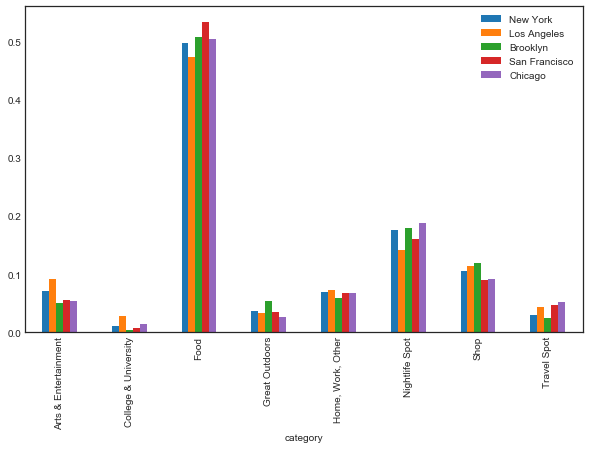

In [41]:
plt.figure()
city_category.plot.bar(figsize = (10,6))
plt.show()

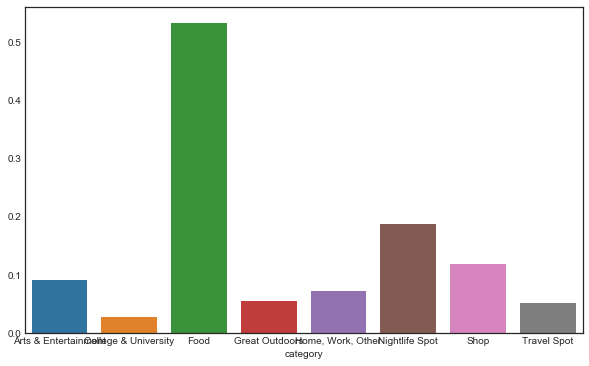

In [23]:
sns.set_style('white')
fig, ax = plt.subplots(figsize = (10,6))
for i in range(5):
    sns.barplot(x = city_category.index,y = city_category.iloc[:,i].values,data = city_category,ax = ax,label = i)
plt.show()

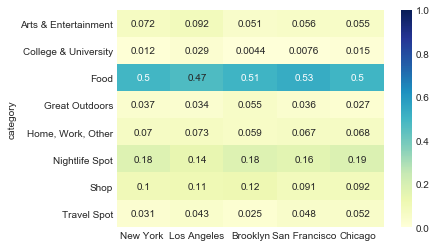

In [42]:
#热力图绘制
plt.figure()
ax = sns.heatmap(city_category,cmap="YlGnBu", vmin=0, vmax=1,annot=True)
#ax.set_xticklabels(('Arts & Entertainment', 'College & University', 'Food', 'Great Outdoors', 
                   # 'Home,Work','Nightlife','Shop','Travel Spot'),fontsize = 12)
plt.show()

## 本地用户种类整理

In [181]:
df = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\category.csv',sep = ',',encoding = 'latin-1')

In [182]:
df

,f,cid,c,name
0,Arts & Entertainment,4bf58dd8d48988d1e1931735,0.0,Arcade
1,Arts & Entertainment,4bf58dd8d48988d1e2931735,150.0,Art Gallery
2,Arts & Entertainment,4bf58dd8d48988d1e4931735,54.0,Bowling Alley
3,Arts & Entertainment,4bf58dd8d48988d17c941735,206.0,Casino
4,Arts & Entertainment,4bf58dd8d48988d18e941735,151.0,Comedy Club
5,Arts & Entertainment,4bf58dd8d48988d1f1931735,52.0,General Entertainment
6,Arts & Entertainment,4bf58dd8d48988d17f941735,117.0,Movie Theater
7,Arts & Entertainment,4bf58dd8d48988d17e941735,297.0,Indie Movie Theater
8,Arts & Entertainment,4bf58dd8d48988d180941735,119.0,Multiplex
9,Arts & Entertainment,4bf58dd8d48988d181941735,61.0,Museum


In [101]:
category = {'Arts & Entertainment':df.iloc[1:40].cid.values,
            'College & University':df.iloc[41:72].cid.values,
            'Food':df.iloc[73:158].cid.values,
            'Great Outdoors':df.iloc[159:191].cid.values,
            'Home, Work, Other':df.iloc[192:235].cid.values,
            'Nightlife Spot':df.iloc[236:260].cid.values,
            'Shop':df.iloc[261:324].cid.values,
            'Travel Spot':df.iloc[325:352].cid.values
           }

In [102]:
def f(x):
    if x != None:
        return str(x).split(',')
    else:
        return None
pref = nyctips_home[['uid','category']]
pref['category'] = pref['category'].map(f)

cat = []  #整理用户种类
for i in range(len(pref)):
    n,c= pref.iloc[i]
    if c != None:
        for p in c:
            cat.append([n,p])

cpref = pd.DataFrame(cat,columns = ['uid','cid'])
#cpref.index = cpref['uid']
cpref['cid'] = cpref['cid'].replace('nan',np.nan)
cpref = cpref.dropna()
cpref.index = np.arange(len(cpref))
cpref['nums'] = np.ones(len(cpref))

group1 = cpref.groupby(['uid','cid'],as_index = False).count()

group1

D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,uid,cid,nums
0,0,4bf58dd8d48988d103941735,1
1,0,4bf58dd8d48988d103951735,1
2,0,4bf58dd8d48988d108941735,1
3,0,4bf58dd8d48988d10b941735,3
4,0,4bf58dd8d48988d10c941735,7
5,0,4bf58dd8d48988d10d941735,1
6,0,4bf58dd8d48988d110941735,24
7,0,4bf58dd8d48988d110951735,1
8,0,4bf58dd8d48988d111941735,7
9,0,4bf58dd8d48988d112941735,2


In [103]:
fcid = df.copy()[['f','cid']]
fcid.index = fcid.cid
fcid = fcid['f']
homec = {'Arts & Entertainment':0,
            'College & University':0,
            'Food':0,
            'Great Outdoors':0,
            'Home, Work, Other':0,
            'Nightlife Spot':0,
            'Shop':0,
            'Travel Spot':0
           }
cset = df.cid.values

for index, row in group1.iterrows():
    c = row[1]
    v  =row[2]
    if c in cset: 
        homec[fcid.loc[c]] += v

In [104]:
homec

{'Arts & Entertainment': 5744,
 'College & University': 904,
 'Food': 40669,
 'Great Outdoors': 3025,
 'Home, Work, Other': 5575,
 'Nightlife Spot': 14459,
 'Shop': 8728,
 'Travel Spot': 2365}

## 非本地用户种类整理

In [105]:
def f(x):
    if x != None:
        return str(x).split(',')
    else:
        return None
pref = nyctips_out[['uid','category']]
pref['category'] = pref['category'].map(f)

cat = []  #整理用户种类
for i in range(len(pref)):
    n,c= pref.iloc[i]
    if c != None:
        for p in c:
            cat.append([n,p])

cpref = pd.DataFrame(cat,columns = ['uid','cid'])
#cpref.index = cpref['uid']
cpref['cid'] = cpref['cid'].replace('nan',np.nan)
cpref = cpref.dropna()
cpref.index = np.arange(len(cpref))
cpref['nums'] = np.ones(len(cpref))

group2 = cpref.groupby(['uid','cid'],as_index = False).count()

group2

D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,uid,cid,nums
0,287,4bf58dd8d48988d10b951735,1
1,287,4bf58dd8d48988d10c941735,3
2,287,4bf58dd8d48988d110941735,3
3,287,4bf58dd8d48988d111941735,1
4,287,4bf58dd8d48988d113941735,2
5,287,4bf58dd8d48988d116941735,5
6,287,4bf58dd8d48988d11d941735,1
7,287,4bf58dd8d48988d120941735,1
8,287,4bf58dd8d48988d121941735,1
9,287,4bf58dd8d48988d123941735,1


In [106]:
#fcid = df.copy()[['f','cid']]
#fcid.index = fcid.cid
#fcid = fcid['f']
outc = {'Arts & Entertainment':0,
            'College & University':0,
            'Food':0,
            'Great Outdoors':0,
            'Home, Work, Other':0,
            'Nightlife Spot':0,
            'Shop':0,
            'Travel Spot':0
           }
cset = df.cid.values

for index, row in group2.iterrows():
    c = row[1]
    v  =row[2]
    if c in cset: 
        outc[fcid.loc[c]] += v

In [109]:
#根据签到数统计的种类热度
out = pd.Series(outc) #/ len(nyctips_out)
out

Arts & Entertainment     2969
College & University      429
Food                    16111
Great Outdoors           1579
Home, Work, Other        2249
Nightlife Spot           5794
Shop                     3703
Travel Spot              1661
dtype: int64

In [110]:
#根据签到数统计的种类热度
home =pd.Series(homec) #/ len(nyctips_home)
home

Arts & Entertainment     5744
College & University      904
Food                    40669
Great Outdoors           3025
Home, Work, Other        5575
Nightlife Spot          14459
Shop                     8728
Travel Spot              2365
dtype: int64

根据用户的数目统计种类的热度

In [111]:
group1 = group1[['uid','cid']]
g1 = group1.groupby('cid',as_index = False).count()

outc_user = {'Arts & Entertainment':0,
            'College & University':0,
            'Food':0,
            'Great Outdoors':0,
            'Home, Work, Other':0,
            'Nightlife Spot':0,
            'Shop':0,
            'Travel Spot':0
           }
cset = df.cid.values

for index, row in g1.iterrows():
    c = row[0]
    v  =row[1]
    if c in cset: 
        outc_user[fcid.loc[c]] += v

In [112]:
outc_user

{'Arts & Entertainment': 3640,
 'College & University': 694,
 'Food': 25401,
 'Great Outdoors': 2055,
 'Home, Work, Other': 3591,
 'Nightlife Spot': 7423,
 'Shop': 6050,
 'Travel Spot': 1658}

In [113]:
group2 = group2[['uid','cid']]
g2 = group2.groupby('cid',as_index = False).count()

homec_user = {'Arts & Entertainment':0,
            'College & University':0,
            'Food':0,
            'Great Outdoors':0,
            'Home, Work, Other':0,
            'Nightlife Spot':0,
            'Shop':0,
            'Travel Spot':0
           }
cset = df.cid.values

for index, row in g2.iterrows():
    c = row[0]
    v  =row[1]
    if c in cset: 
        homec_user[fcid.loc[c]] += v

In [141]:
home_user = pd.Series(homec_user) 
#home_user = pd.DataFrame(home_user, index = home_user.index,columns = ['home'])
home_user

Arts & Entertainment     2056
College & University      343
Food                    10730
Great Outdoors           1128
Home, Work, Other        1565
Nightlife Spot           3307
Shop                     2835
Travel Spot              1057
dtype: int64

In [142]:
out_user = pd.Series(outc_user)
#out_user = pd.DataFrame(out_user, index = out_user.index,columns = ['out'])
out_user 

Arts & Entertainment     3640
College & University      694
Food                    25401
Great Outdoors           2055
Home, Work, Other        3591
Nightlife Spot           7423
Shop                     6050
Travel Spot              1658
dtype: int64

In [137]:
u  =pd.concat([home_user,out_user],axis = 1)
u

,home,out
Arts & Entertainment,2056,3640
College & University,343,694
Food,10730,25401
Great Outdoors,1128,2055
"Home, Work, Other",1565,3591
Nightlife Spot,3307,7423
Shop,2835,6050
Travel Spot,1057,1658


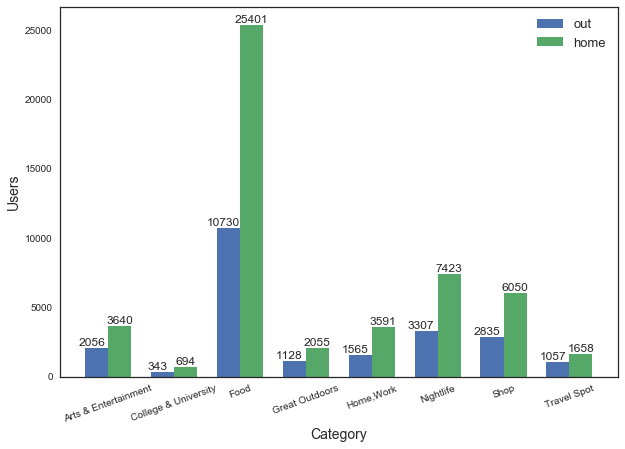

In [163]:
ind = np.arange(8)  # the x locations for the groups
width = 0.35 # the width of the bars
sns.set_style('white')
fig, ax = plt.subplots(figsize = (10,6.8))
fig.figsize  =[30,10]
rects1 = ax.bar(ind - width/2, home_user.values, width, label='out')#,yerr = (200, 300, 400, 100, 200,200,400,200)
rects2 = ax.bar(ind + width/2, out_user.values, width, label='home')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Users',fontsize = 14)
ax.set_xlabel('Category',fontsize = 14)
#ax.set_title('Categories visited by users',fontsize = 16)
ax.set_xticks(ind)
ax.set_xticklabels(('Arts & Entertainment', 'College & University', 'Food', 'Great Outdoors', 
                    'Home,Work','Nightlife','Shop','Travel Spot'),rotation=20,fontsize = 10) #,rotation=50
#'Arts & Entertainment', 'College & University', 'Food', 'Great Outdoors', 'Home, Work, Other','Nightlife Spot','Shop','Travel Spot'
for rect, label in zip(rects1, home_user.values): 
    ax.text(rect.get_x()+0.1, rect.get_height() + 5, label, ha='center', va='bottom')
for rect, label in zip(rects2, out_user.values): 
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height() + 5, label, ha='center', va='bottom')


ax.legend(fontsize = 13)
plt.show()


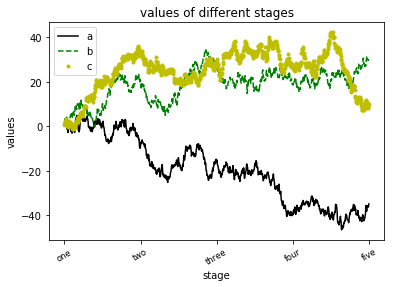

In [18]:
fig,ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(),'k',color = 'k',label = 'a')
ax.plot(np.random.randn(1000).cumsum(),'k--',color = 'g',label = 'b')
ax.plot(np.random.randn(1000).cumsum(),'k.',color = 'y',label = 'c')
ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels(['one','two','three','four','five'],rotation = 30, fontsize = 'small')
ax.set_xlabel('stage')
ax.set_ylabel('values')
ax.set_title('values of different stages')
ax.legend(loc = 'best')
plt.show()

种类整理

In [105]:
def f(x):
    if x != None:
        return str(x).split(',')
    else:
        return None
pref = nyc[['uid','category']]
pref['category'] = pref['category'].map(f)
pref.head()

D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,uid,category
0,0,[4bf58dd8d48988d1ce941735]
1,0,"[4bf58dd8d48988d1d2941735, 4bf58dd8d48988d1ff9..."
2,0,[4bf58dd8d48988d1fa931735]
3,0,[4bf58dd8d48988d116941735]
4,0,"[4bf58dd8d48988d1ca941735, 4bf58dd8d48988d1169..."


In [119]:
cat = []  #整理用户种类
for i in range(len(pref)):
    n,c= pref.iloc[i]
    if c != None:
        for p in c:
            cat.append([n,p])

In [120]:
cpref = pd.DataFrame(cat,columns = ['uid','cid'])
#cpref.index = cpref['uid']
cpref['cid'] = cpref['cid'].replace('nan',np.nan)
cpref = cpref.dropna()
cpref.index = np.arange(len(cpref))
cpref['nums'] = np.ones(len(cpref))

g = cpref.groupby(['uid','cid'],as_index = False).count()

g

,uid,cid,nums
0,0,4bf58dd8d48988d100941735,1
1,0,4bf58dd8d48988d103941735,1
2,0,4bf58dd8d48988d103951735,1
3,0,4bf58dd8d48988d108941735,1
4,0,4bf58dd8d48988d10b941735,3
5,0,4bf58dd8d48988d10c941735,9
6,0,4bf58dd8d48988d10d941735,3
7,0,4bf58dd8d48988d10f941735,1
8,0,4bf58dd8d48988d110941735,25
9,0,4bf58dd8d48988d110951735,1


In [121]:
g.index = g['cid']
g = g.loc[inter]
g = g.sort_values(by = 'uid')
g.index = np.arange(len(g))
g

,uid,cid,nums
0,0,4bf58dd8d48988d1e1931735,2
1,0,4bf58dd8d48988d14e941735,31
2,0,4bf58dd8d48988d1fe931735,1
3,0,4bf58dd8d48988d1c6941735,1
4,0,4bf58dd8d48988d1ce941735,6
5,0,4bf58dd8d48988d1c7941735,3
6,0,4bf58dd8d48988d1cd941735,1
7,0,4bf58dd8d48988d1f6931735,1
8,0,4bf58dd8d48988d150941735,3
9,0,4bf58dd8d48988d1d2941735,9


In [122]:
ci = g[['cid']].drop_duplicates()
ci['c'] = np.arange(len(ci))
ci.index = ci['cid']
del ci['cid']

In [123]:
ci

,c
cid,
4bf58dd8d48988d1e1931735,0
4bf58dd8d48988d14e941735,1
4bf58dd8d48988d1fe931735,2
4bf58dd8d48988d1c6941735,3
4bf58dd8d48988d1ce941735,4
4bf58dd8d48988d1c7941735,5
4bf58dd8d48988d1cd941735,6
4bf58dd8d48988d1f6931735,7
4bf58dd8d48988d150941735,8


In [124]:
g = pd.merge(g, ci, left_on = 'cid', right_index = True, how = 'left')
del g['cid']
#g.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\f\user-category.csv')

In [126]:
g = g.reindex(columns = ['uid','c','nums'])
g

,uid,c,nums
0,0,0,2
1,0,1,31
2,0,2,1
3,0,3,1
4,0,4,6
5,0,5,3
6,0,6,1
7,0,7,1
8,0,8,3
9,0,9,9


In [108]:
category = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\category.csv',encoding = 'latin-1',sep = ',')
category.head()   #种类树数据集

,cid,c,name
0,0,NaN,Arts & Entertainment
1,4bf58dd8d48988d1e1931735,0.0,Arcade
2,4bf58dd8d48988d1e2931735,150.0,Art Gallery
3,4bf58dd8d48988d1e4931735,54.0,Bowling Alley
4,4bf58dd8d48988d17c941735,206.0,Casino


In [109]:
category['cid']

0                             0
1      4bf58dd8d48988d1e1931735
2      4bf58dd8d48988d1e2931735
3      4bf58dd8d48988d1e4931735
4      4bf58dd8d48988d17c941735
5      4bf58dd8d48988d18e941735
6      4bf58dd8d48988d1f1931735
7      4bf58dd8d48988d17f941735
8      4bf58dd8d48988d17e941735
9      4bf58dd8d48988d180941735
10     4bf58dd8d48988d181941735
11     4bf58dd8d48988d18f941735
12     4bf58dd8d48988d190941735
13     4bf58dd8d48988d192941735
14     4bf58dd8d48988d191941735
15     4bf58dd8d48988d1e5931735
16     4bf58dd8d48988d1e6931735
17     4bf58dd8d48988d1e7931735
18     4bf58dd8d48988d1e8931735
19     4bf58dd8d48988d1e9931735
20     4bf58dd8d48988d1f2931735
21     4bf58dd8d48988d1f3931735
22     4bf58dd8d48988d134941735
23     4bf58dd8d48988d135941735
24     4bf58dd8d48988d136941735
25     4bf58dd8d48988d137941735
26     4bf58dd8d48988d1e3931735
27     4bf58dd8d48988d1f4931735
28     4bf58dd8d48988d184941735
29     4bf58dd8d48988d18c941735
                 ...           
322    4

In [113]:
cat = category.copy()
cat.index = cat['cid']
inter = cat.index.intersection(ci.index)
diff = cat.index.difference(ci.index)

1. 种类树中总共有：352类
2. 数据集中用户访问种类数为：354类
3. 两个种类数据的交集为：352类
    - 种类数数据集多出9种，8个一级种类
    - 用户访问种类中11种，不在种类树数据集中


In [114]:
inter

Index(['4bf58dd8d48988d1e1931735', '4bf58dd8d48988d1e2931735',
       '4bf58dd8d48988d1e4931735', '4bf58dd8d48988d17c941735',
       '4bf58dd8d48988d18e941735', '4bf58dd8d48988d1f1931735',
       '4bf58dd8d48988d17f941735', '4bf58dd8d48988d17e941735',
       '4bf58dd8d48988d180941735', '4bf58dd8d48988d181941735',
       ...
       '4bf58dd8d48988d1fb931735', '4bf58dd8d48988d132951735',
       '4bf58dd8d48988d133951735', '4bf58dd8d48988d1fc931735',
       '4bf58dd8d48988d12f951735', '4d954b16a243a5684b65b473',
       '4bf58dd8d48988d1fd931735', '4bf58dd8d48988d130951735',
       '4bf58dd8d48988d129951735', '4bf58dd8d48988d12a951735'],
      dtype='object', name='cid', length=343)

In [115]:
diff

Index(['0', '1', '2', '3', '4', '4bf58dd8d48988d1b9941735', '5', '6', '7'], dtype='object', name='cid')

In [116]:
ci.index.difference(cat.index)

Index(['4d4b7104d754a06370d81259', '4d4b7105d754a06372d81259',
       '4d4b7105d754a06374d81259', '4d4b7105d754a06375d81259',
       '4d4b7105d754a06376d81259', '4d4b7105d754a06377d81259',
       '4d4b7105d754a06378d81259', '4d4b7105d754a06379d81259',
       '4deefb944765f83613cdba6e', '4deefc054765f83613cdba6f',
       '4def73e84765ae376e57713a'],
      dtype='object', name='cid')

In [117]:
category

,cid,c,name
0,0,NaN,Arts & Entertainment
1,4bf58dd8d48988d1e1931735,0.0,Arcade
2,4bf58dd8d48988d1e2931735,150.0,Art Gallery
3,4bf58dd8d48988d1e4931735,54.0,Bowling Alley
4,4bf58dd8d48988d17c941735,206.0,Casino
5,4bf58dd8d48988d18e941735,151.0,Comedy Club
6,4bf58dd8d48988d1f1931735,52.0,General Entertainment
7,4bf58dd8d48988d17f941735,117.0,Movie Theater
8,4bf58dd8d48988d17e941735,297.0,Indie Movie Theater
9,4bf58dd8d48988d180941735,119.0,Multiplex


In [107]:
ci

,c
cid,
4bf58dd8d48988d1e1931735,0
4bf58dd8d48988d14e941735,1
4bf58dd8d48988d1fe931735,2
4bf58dd8d48988d1c6941735,3
4bf58dd8d48988d1ce941735,4
4bf58dd8d48988d1c7941735,5
4bf58dd8d48988d1cd941735,6
4bf58dd8d48988d1f6931735,7
4bf58dd8d48988d150941735,8


In [108]:
c  = pd.merge(category,ci,left_on = 'cid',right_index = True,how = 'left')

In [110]:
c.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\category.csv')

In [111]:
c

,cid,name,c
0,0,Arts & Entertainment,NaN
1,4bf58dd8d48988d1e1931735,Arcade,0.0
2,4bf58dd8d48988d1e2931735,Art Gallery,150.0
3,4bf58dd8d48988d1e4931735,Bowling Alley,54.0
4,4bf58dd8d48988d17c941735,Casino,206.0
5,4bf58dd8d48988d18e941735,Comedy Club,151.0
6,4bf58dd8d48988d1f1931735,General Entertainment,52.0
7,4bf58dd8d48988d17f941735,Movie Theater,117.0
8,4bf58dd8d48988d17e941735,Indie Movie Theater,297.0
9,4bf58dd8d48988d180941735,Multiplex,119.0


In [2]:
cat = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\f\user-category.csv',encoding = 'latin-1')
cat

,user,category,nums
0,0,0,2
1,0,1,31
2,0,2,1
3,0,3,1
4,0,4,6
5,0,5,3
6,0,6,1
7,0,7,1
8,0,8,3
9,0,9,9


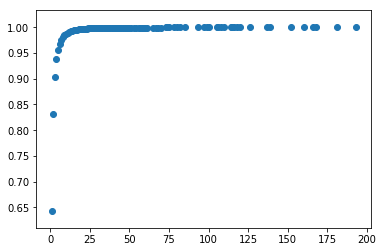

In [3]:
num = cat['nums']
con =num.value_counts().sort_index() / len(num) 
con = con.cumsum()
plt.figure(figsize = (6,4))
#ax = sns.barplot(con.index, con.values)
plt.scatter(con.index, con.values)
#for rect, value in zip(ax.patches, con.values):
    #ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5,value, ha = 'center', va = 'bottom')
plt.show()

In [6]:
#种类评分划分

def f(x):
    if x == 1:
        return 2
    elif x == 2:
        return 3
    elif x == 3 or x == 4:
        return 4
    elif x >= 5:
        return 5
    else:
        return 1

cat['nums'] = cat['nums'].map(f)
cat

,user,category,nums
0,0,0,3
1,0,1,5
2,0,2,2
3,0,3,2
4,0,4,5
5,0,5,4
6,0,6,2
7,0,7,2
8,0,8,4
9,0,9,5


In [8]:
cat.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\user-category.txt',sep = ' ',header=False,index=False)

In [11]:
cat['nums'].value_counts() / len(cat)

2    0.643286
3    0.188848
4    0.106606
5    0.061261
Name: nums, dtype: float64

In [13]:
tips.index = tips.uid
con = tips.index.value_counts()
index = con[con>9].index
tips = tips.loc[index]

In [14]:
tips

,uid,vid,text,time,ncat,category,city_u,state_u,city_v,state_v
uid,,,,,,,,,,
6787469,6787469,4d14c82de190721ec4200a21,You can buy CEW award-winning Olay Regenerist ...,1.309970e+09,0.0,NaN,New York,NY,Hyattsville,Maryland
6787469,6787469,4d14c82de190721ec4200a21,You can buy CEW award-winning Olay Total Effec...,1.309970e+09,0.0,NaN,New York,NY,Hyattsville,Maryland
6787469,6787469,4bd465f06798ef3b9c7e618d,You can buy CEW award-winning Olay Total Effec...,1.309970e+09,1.0,4bf58dd8d48988d1f6941735,New York,NY,Annandale,VA
6787469,6787469,4bd465f06798ef3b9c7e618d,You can buy CEW award-winning Olay Regenerist ...,1.309970e+09,1.0,4bf58dd8d48988d1f6941735,New York,NY,Annandale,VA
6787469,6787469,4c14f9f27f7f2d7fa1a1e168,You can buy CEW award-winning Olay Regenerist ...,1.309970e+09,1.0,4bf58dd8d48988d1f6941735,New York,NY,Annandale,Virginia
6787469,6787469,4c14f9f27f7f2d7fa1a1e168,You can buy CEW award-winning Olay Total Effec...,1.309970e+09,1.0,4bf58dd8d48988d1f6941735,New York,NY,Annandale,Virginia
6787469,6787469,4b37f857f964a520704925e3,You can buy CEW award-winning Olay Total Effec...,1.309970e+09,1.0,4bf58dd8d48988d1f6941735,New York,NY,Springfield,VA
6787469,6787469,4b37f857f964a520704925e3,You can buy CEW award-winning Olay Regenerist ...,1.309970e+09,1.0,4bf58dd8d48988d1f6941735,New York,NY,Springfield,VA
6787469,6787469,4c02cd846c349c74023b750c,You can buy CEW award-winning Olay Regenerist ...,1.309970e+09,1.0,4bf58dd8d48988d1f6941735,New York,NY,Oxon Hill,MD


In [15]:
def f(x):
    if x != None:
        return str(x).split(',')
    else:
        return None
pref = tips[['uid','category']]
pref['category'] = pref['category'].map(f)
pref.head()

D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,uid,category
uid,,
6787469,6787469,[nan]
6787469,6787469,[nan]
6787469,6787469,[4bf58dd8d48988d1f6941735]
6787469,6787469,[4bf58dd8d48988d1f6941735]
6787469,6787469,[4bf58dd8d48988d1f6941735]


In [16]:
cat = []  #整理用户种类
for i in range(len(pref)):
    n,c= pref.iloc[i]
    if c != None:
        for p in c:
            cat.append([n,p])

cpref = pd.DataFrame(cat,columns = ['uid','cid'])
#cpref.index = cpref['uid']
cpref['cid'] = cpref['cid'].replace('nan',np.nan)
cpref = cpref.dropna()
cpref.index = np.arange(len(cpref))
cpref['nums'] = np.ones(len(cpref))

g = cpref.groupby(['uid','cid'],as_index = False).count()

g

,uid,cid,nums
0,33,4bf58dd8d48988d100941735,1
1,33,4bf58dd8d48988d103941735,1
2,33,4bf58dd8d48988d103951735,1
3,33,4bf58dd8d48988d108941735,1
4,33,4bf58dd8d48988d10b941735,3
5,33,4bf58dd8d48988d10c941735,9
6,33,4bf58dd8d48988d10d941735,3
7,33,4bf58dd8d48988d10f941735,1
8,33,4bf58dd8d48988d110941735,25
9,33,4bf58dd8d48988d110951735,1


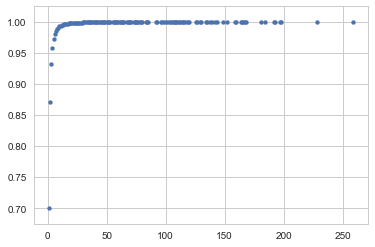

In [160]:
num = g['nums']
con =num.value_counts().sort_index() / len(num) 
con = con.cumsum()
plt.figure(figsize = (6,4))
#ax = sns.barplot(con.index, con.values)
plt.scatter(con.index, con.values,s = 16)
#for rect, value in zip(ax.patches, con.values):
    #ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5,value, ha = 'center', va = 'bottom')
plt.show()

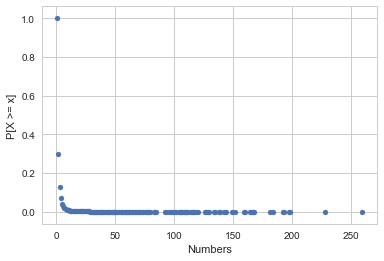

In [159]:
con = num.value_counts().sort_index() 

pro = con / sum(con)
csum_pro = pro.sort_index(ascending = False).cumsum()
plt.figure()
plt.scatter(csum_pro.index, csum_pro.values,s = 25)
plt.xlabel('Numbers')
plt.ylabel('P[X >= x]')
#plt.title('Distribution of numbers of a user visit a category')
plt.show()

In [156]:
label = ['x=1','x=2','x=3 or x=4','x>=5']
value = [con.loc[1],con.loc[2],con.loc[3]+con.loc[4],con.loc[5:].sum()]

In [75]:
value

[271484, 66537, 33827, 16025]

In [76]:
label

['x=1', 'x=2', 'x=3 or x=4', 'x>=5']

In [157]:
df = pd.DataFrame(value, index = label)

In [78]:
df

,0
x=1,271484
x=2,66537
x=3 or x=4,33827
x>=5,16025


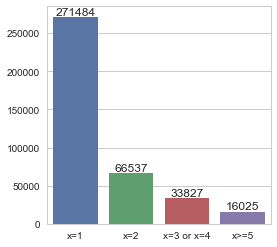

In [158]:
plt.figure(figsize = (4,4))
ax = sns.barplot(x=label, y=value)
locs, labels = plt.xticks()
rects = ax.patches
labels = value
for rect, label in zip(rects, labels): 
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 5, label, ha='center', va='bottom')
plt.show()

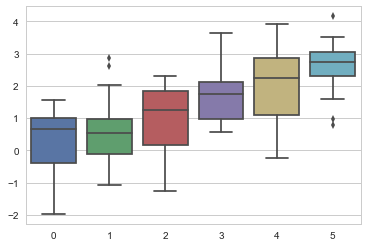

In [7]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);
plt.show()

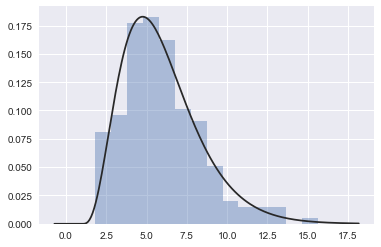

In [8]:
import numpy as np
import seaborn as sns
from scipy import stats, integrate
%matplotlib inline
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))#每次产生的随机数相同
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)


          x         y
0 -0.291335  1.189904
1 -0.518472 -0.389123
2  2.868624  2.314568
3  0.385191  0.591987
4 -0.031445  0.717529


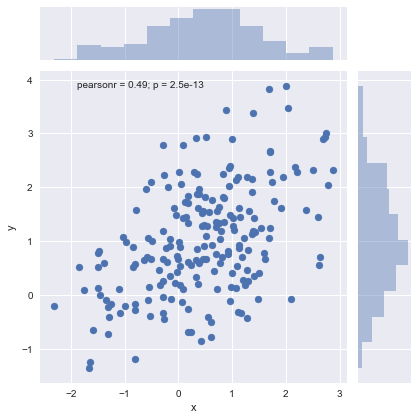

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
%matplotlib inline
sns.set(color_codes=True)
mean, cov = [0.5, 1], [(1, .5),(.5, 1)]#设置均值(一组参数)和协方差（两组参数）
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
print(df.head())
sns.jointplot(x="x", y="y", data=df)
plt.show()
